# Model Construction

In [16]:
#first get the data
import pandas as pd
import numpy as np

data = pd.read_csv('sentiments_and_Stocks_24_v2.csv')

In [17]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,var1(t-5),var1(t-4),var1(t-3),...,"('polarity_score', 15)","('polarity_score', 16)","('polarity_score', 17)","('polarity_score', 18)","('polarity_score', 19)","('polarity_score', 20)","('polarity_score', 21)","('polarity_score', 22)","('polarity_score', 23)",Date.1
2015-12-31,2015-12-31,107.01,107.03,104.82,105.26,98.66,40912300.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,2016-01-04,102.61,105.37,102.00,105.35,98.74,67649400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,2016-01-05,105.75,105.85,102.41,102.71,96.27,55791000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,2016-01-06,100.56,102.37,99.87,100.70,94.38,68457400.0,NaN,NaN,105.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,2016-01-07,98.68,100.13,96.43,96.45,90.40,81094400.0,NaN,105.26,105.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-27,2019-09-27,220.54,220.96,217.28,218.82,218.82,25352000.0,217.73,218.72,217.68,...,0.068073,0.214080,0.319836,0.269164,0.442438,0.202244,0.243680,-0.174160,0.477737,2019-09-27
2019-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.515980,0.404260,0.674100,0.170260,0.509233,0.133567,-0.026400,0.214700,0.709700,2019-09-28
2019-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.341157,0.445833,0.265385,0.448700,0.251533,0.313992,0.314440,0.149367,0.134429,2019-09-29
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.316888,0.278555,0.275112,0.256673,0.223147,0.269098,0.336869,0.442527,0.393921,2019-09-30


In [18]:
data = data.drop(columns='Date.1')

In [19]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)',
       'previous-close', 'movement', 'movement01', 'Unnamed: 0',
       'polarity_score', '('polarity_score', 0)', '('polarity_score', 1)',
       '('polarity_score', 2)', '('polarity_score', 3)',
       '('polarity_score', 4)', '('polarity_score', 5)',
       '('polarity_score', 6)', '('polarity_score', 7)',
       '('polarity_score', 8)', '('polarity_score', 9)',
       '('polarity_score', 10)', '('polarity_score', 11)',
       '('polarity_score', 12)', '('polarity_score', 13)',
       '('polarity_score', 14)', '('polarity_score', 15)',
       '('polarity_score', 16)', '('polarity_score', 17)',
       '('polarity_score', 18)', '('polarity_score', 19)',
       '('polarity_score', 20)', '('polarity_score', 21)',
       '('polarity_score', 22)', '('polarity_score', 23)'],
      dtype='object')

In [20]:
#get the required models 
from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
data = data.reset_index(level=0, drop=True).reset_index()

In [29]:
data.columns

Index(['level_0', 'index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)',
       'var1(t-1)', 'previous-close', 'movement', 'movement01', 'Unnamed: 0',
       'polarity_score', '('polarity_score', 0)', '('polarity_score', 1)',
       '('polarity_score', 2)', '('polarity_score', 3)',
       '('polarity_score', 4)', '('polarity_score', 5)',
       '('polarity_score', 6)', '('polarity_score', 7)',
       '('polarity_score', 8)', '('polarity_score', 9)',
       '('polarity_score', 10)', '('polarity_score', 11)',
       '('polarity_score', 12)', '('polarity_score', 13)',
       '('polarity_score', 14)', '('polarity_score', 15)',
       '('polarity_score', 16)', '('polarity_score', 17)',
       '('polarity_score', 18)', '('polarity_score', 19)',
       '('polarity_score', 20)', '('polarity_score', 21)',
       '('polarity_score', 22)', '('polarity_score', 23)'],
      dtype='object')

In [30]:
data

,level_0,index,Date,Open,High,Low,Close,Adj Close,Volume,var1(t-5),...,"('polarity_score', 14)","('polarity_score', 15)","('polarity_score', 16)","('polarity_score', 17)","('polarity_score', 18)","('polarity_score', 19)","('polarity_score', 20)","('polarity_score', 21)","('polarity_score', 22)","('polarity_score', 23)"
0,0,0,2015-12-31,107.01,107.03,104.82,105.26,98.66,40912300.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2016-01-04,102.61,105.37,102.00,105.35,98.74,67649400.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2016-01-05,105.75,105.85,102.41,102.71,96.27,55791000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,2016-01-06,100.56,102.37,99.87,100.70,94.38,68457400.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,2016-01-07,98.68,100.13,96.43,96.45,90.40,81094400.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,956,958,2019-09-27,220.54,220.96,217.28,218.82,218.82,25352000.0,217.73,...,0.257803,0.068073,0.214080,0.319836,0.269164,0.442438,0.202244,0.243680,-0.174160,0.477737
957,957,959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000375,0.515980,0.404260,0.674100,0.170260,0.509233,0.133567,-0.026400,0.214700,0.709700
958,958,960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.286760,0.341157,0.445833,0.265385,0.448700,0.251533,0.313992,0.314440,0.149367,0.134429
959,959,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.387393,0.316888,0.278555,0.275112,0.256673,0.223147,0.269098,0.336869,0.442527,0.393921


In [32]:
data = data.drop([957, 958, 959, 960], axis=0)

In [35]:
data=data.fillna(0)

In [36]:
data.columns

Index(['level_0', 'index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)',
       'var1(t-1)', 'previous-close', 'movement', 'movement01', 'Unnamed: 0',
       'polarity_score', '('polarity_score', 0)', '('polarity_score', 1)',
       '('polarity_score', 2)', '('polarity_score', 3)',
       '('polarity_score', 4)', '('polarity_score', 5)',
       '('polarity_score', 6)', '('polarity_score', 7)',
       '('polarity_score', 8)', '('polarity_score', 9)',
       '('polarity_score', 10)', '('polarity_score', 11)',
       '('polarity_score', 12)', '('polarity_score', 13)',
       '('polarity_score', 14)', '('polarity_score', 15)',
       '('polarity_score', 16)', '('polarity_score', 17)',
       '('polarity_score', 18)', '('polarity_score', 19)',
       '('polarity_score', 20)', '('polarity_score', 21)',
       '('polarity_score', 22)', '('polarity_score', 23)'],
      dtype='object')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 956
Data columns (total 43 columns):
level_0                   957 non-null int64
index                     957 non-null int64
Date                      957 non-null object
Open                      957 non-null float64
High                      957 non-null float64
Low                       957 non-null float64
Close                     957 non-null float64
Adj Close                 957 non-null float64
Volume                    957 non-null float64
var1(t-5)                 957 non-null float64
var1(t-4)                 957 non-null float64
var1(t-3)                 957 non-null float64
var1(t-2)                 957 non-null float64
var1(t-1)                 957 non-null float64
previous-close            957 non-null float64
movement                  957 non-null object
movement01                957 non-null float64
Unnamed: 0                957 non-null object
polarity_score            957 non-null float64
('polarit

In [44]:
data_with_sentiment = data.iloc[898:, :]

In [45]:
data_with_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 898 to 956
Data columns (total 43 columns):
level_0                   59 non-null int64
index                     59 non-null int64
Date                      59 non-null object
Open                      59 non-null float64
High                      59 non-null float64
Low                       59 non-null float64
Close                     59 non-null float64
Adj Close                 59 non-null float64
Volume                    59 non-null float64
var1(t-5)                 59 non-null float64
var1(t-4)                 59 non-null float64
var1(t-3)                 59 non-null float64
var1(t-2)                 59 non-null float64
var1(t-1)                 59 non-null float64
previous-close            59 non-null float64
movement                  59 non-null object
movement01                59 non-null float64
Unnamed: 0                59 non-null object
polarity_score            59 non-null float64
('polarity_score', 0)     5

In [70]:
data = data_with_sentiment

X = data.drop(columns=['level_0', 'movement','movement01', 'Unnamed: 0', 'Date'])
y = data['movement01']

In [71]:
X.columns

Index(['index', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)',
       'previous-close', 'polarity_score', '('polarity_score', 0)',
       '('polarity_score', 1)', '('polarity_score', 2)',
       '('polarity_score', 3)', '('polarity_score', 4)',
       '('polarity_score', 5)', '('polarity_score', 6)',
       '('polarity_score', 7)', '('polarity_score', 8)',
       '('polarity_score', 9)', '('polarity_score', 10)',
       '('polarity_score', 11)', '('polarity_score', 12)',
       '('polarity_score', 13)', '('polarity_score', 14)',
       '('polarity_score', 15)', '('polarity_score', 16)',
       '('polarity_score', 17)', '('polarity_score', 18)',
       '('polarity_score', 19)', '('polarity_score', 20)',
       '('polarity_score', 21)', '('polarity_score', 22)',
       '('polarity_score', 23)'],
      dtype='object')

In [73]:
len(X) -5

54

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 898 to 956
Data columns (total 38 columns):
index                     59 non-null int64
Open                      59 non-null float64
High                      59 non-null float64
Low                       59 non-null float64
Close                     59 non-null float64
Adj Close                 59 non-null float64
Volume                    59 non-null float64
var1(t-5)                 59 non-null float64
var1(t-4)                 59 non-null float64
var1(t-3)                 59 non-null float64
var1(t-2)                 59 non-null float64
var1(t-1)                 59 non-null float64
previous-close            59 non-null float64
polarity_score            59 non-null float64
('polarity_score', 0)     59 non-null float64
('polarity_score', 1)     59 non-null float64
('polarity_score', 2)     59 non-null float64
('polarity_score', 3)     59 non-null float64
('polarity_score', 4)     59 non-null float64
('polarity_score', 5) 

In [74]:
# split into inputs and outputs --- NOT USING NORMAL SPLITING SINCE THIS IS TIME SERIES
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

X_train = X.iloc[:54, :]
X_test = X.iloc[54:, :]

y_train = y.iloc[:54]
y_test = y.iloc[54:]

In [75]:
X_test

,index,Open,High,Low,Close,Adj Close,Volume,var1(t-5),var1(t-4),var1(t-3),...,"('polarity_score', 14)","('polarity_score', 15)","('polarity_score', 16)","('polarity_score', 17)","('polarity_score', 18)","('polarity_score', 19)","('polarity_score', 20)","('polarity_score', 21)","('polarity_score', 22)","('polarity_score', 23)"
952,954,218.95,219.84,217.65,218.72,218.72,19165500.0,219.90,220.70,222.77,...,0.190828,0.270535,0.343049,0.281083,0.261723,0.230832,0.123162,0.167173,0.324933,0.192409
953,955,221.03,222.49,217.19,217.68,217.68,31190800.0,220.70,222.77,220.96,...,0.255356,0.172998,0.122513,0.179332,0.291508,0.188630,0.188076,0.100687,0.219986,0.386885
954,956,218.55,221.50,217.14,221.03,221.03,21903400.0,222.77,220.96,217.73,...,0.285036,0.268549,0.207200,0.304985,0.271160,0.323053,0.089138,0.258291,0.461406,0.295829
955,957,220.00,220.94,218.83,219.89,219.89,18833500.0,220.96,217.73,218.72,...,0.173313,0.299513,0.273171,0.239180,0.272396,0.148258,0.229536,0.305687,0.256840,0.395600
956,958,220.54,220.96,217.28,218.82,218.82,25352000.0,217.73,218.72,217.68,...,0.257803,0.068073,0.214080,0.319836,0.269164,0.442438,0.202244,0.243680,-0.174160,0.477737


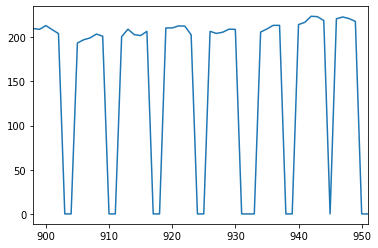

In [60]:
X_train['Close'].plot()

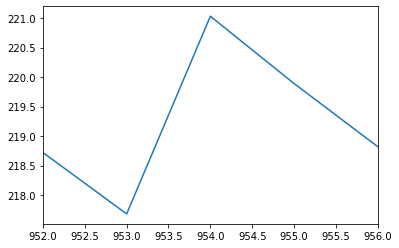

In [61]:
X_test['Close'].plot()

In [62]:
print(y_test)

952    1.0
953    0.0
954    1.0
955    0.0
956    0.0
Name: movement01, dtype: float64


LR 80.000%
KNN 60.000%
KNN-7 40.000%
CART 40.000%
SVM 60.000%
RF 80.000%
GBM 60.000%


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


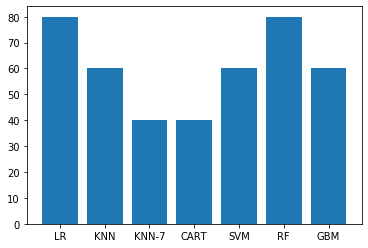

In [76]:
# create a list of models to evaluate
models, names = list(), list()
# logistic
models.append(LogisticRegression())
names.append('LR')
# knn
models.append(KNeighborsClassifier())
names.append('KNN')
# knn
models.append(KNeighborsClassifier(n_neighbors=7))
names.append('KNN-7')
# cart
models.append(DecisionTreeClassifier())
names.append('CART')
# svm
models.append(SVC())
names.append('SVM')
# random forest
models.append(RandomForestClassifier())
names.append('RF')
# gbm
models.append(GradientBoostingClassifier())
names.append('GBM')
# evaluate models
all_scores = list()
for i in range(len(models)):
	# create a pipeline for the model
	scaler = StandardScaler()
	model = Pipeline(steps=[('s',scaler), ('m',models[i])])
	# fit
	# model = models[i]
	model.fit(X_train, y_train)
	# predict
	yhat = model.predict(X_test)
	# evaluate
	score = accuracy_score(y_test, yhat) * 100
	all_scores.append(score)
	# summarize
	print('%s %.3f%%' % (names[i], score))
# plot
pyplot.bar(names, all_scores)
pyplot.show()

In [81]:
#try without the sentiment values: 
X = data.drop(columns=['level_0','index','movement','movement01', 'Date','Date', 'Unnamed: 0', 'polarity_score', '(\'polarity_score\', 0)', '(\'polarity_score\', 1)',
       '(\'polarity_score\', 2)', '(\'polarity_score\', 3)',
       '(\'polarity_score\', 4)', '(\'polarity_score\', 5)',
       '(\'polarity_score\', 6)', '(\'polarity_score\', 7)',
       '(\'polarity_score\', 8)', '(\'polarity_score\', 9)',
       '(\'polarity_score\', 10)', '(\'polarity_score\', 11)',
       '(\'polarity_score\', 12)', '(\'polarity_score\', 13)',
       '(\'polarity_score\', 14)', '(\'polarity_score\', 15)',
       '(\'polarity_score\', 16)', '(\'polarity_score\', 17)',
       '(\'polarity_score\', 18)', '(\'polarity_score\', 19)',
       '(\'polarity_score\', 20)', '(\'polarity_score\', 21)',
       '(\'polarity_score\', 22)', '(\'polarity_score\', 23)'])



In [82]:
X.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'var1(t-5)',
       'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'previous-close'],
      dtype='object')

In [84]:
X_train = X.iloc[:54, :]
X_test = X.iloc[54:, :]

y_train = y.iloc[:54]
y_test = y.iloc[54:]

LR 40.000%
KNN 20.000%
KNN-7 40.000%
CART 60.000%
SVM 40.000%
RF 40.000%
GBM 60.000%


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


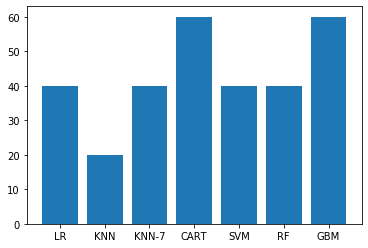

In [85]:
# create a list of models to evaluate
models, names = list(), list()
# logistic
models.append(LogisticRegression())
names.append('LR')
# knn
models.append(KNeighborsClassifier())
names.append('KNN')
# knn
models.append(KNeighborsClassifier(n_neighbors=7))
names.append('KNN-7')
# cart
models.append(DecisionTreeClassifier())
names.append('CART')
# svm
models.append(SVC())
names.append('SVM')
# random forest
models.append(RandomForestClassifier())
names.append('RF')
# gbm
models.append(GradientBoostingClassifier())
names.append('GBM')
# evaluate models
all_scores = list()
for i in range(len(models)):
	# create a pipeline for the model
	scaler = StandardScaler()
	model = Pipeline(steps=[('s',scaler), ('m',models[i])])
	# fit
	# model = models[i]
	model.fit(X_train, y_train)
	# predict
	yhat = model.predict(X_test)
	# evaluate
	score = accuracy_score(y_test, yhat) * 100
	all_scores.append(score)
	# summarize
	print('%s %.3f%%' % (names[i], score))
# plot
pyplot.bar(names, all_scores)
pyplot.show()

In [217]:
!pip install keras

You should consider upgrading via the 'pip install --upgrade pip' command.


In [218]:
!pip install --upgrade setuptools

  Using cached https://files.pythonhosted.org/packages/b2/86/095d2f7829badc207c893dd4ac767e871f6cd547145df797ea26baea4e2e/setuptools-41.2.0-py2.py3-none-any.whl
  Found existing installation: setuptools 39.0.1
    Uninstalling setuptools-39.0.1:
      Successfully uninstalled setuptools-39.0.1
You should consider upgrading via the 'pip install --upgrade pip' command.


In [115]:
conda update --all

Solving environment: done

## Package Plan ##

  environment location: /anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wrapt-1.11.2               |   py37h1de35cc_0          44 KB
    astropy-3.2.1              |   py37h1de35cc_0         6.9 MB
    ipywidgets-7.5.1           |             py_0         107 KB
    libxslt-1.1.33             |       h33a18ac_0         500 KB
    soupsieve-1.9.3            |           py37_0          60 KB
    astroid-2.2.5              |           py37_0         281 KB
    bleach-3.1.0               |           py37_0         221 KB
    mkl-2019.4                 |              233       155.2 MB
    packaging-19.2             |             py_0          30 KB
    spyder-kernels-0.5.2       |           py37_0          69 KB
    scipy-1.3.1                |   py37h1410ff5_0        16.0 MB
    pytz-2019.2                |             py_0        

wrapt-1.11.2         | 44 KB     | ##################################### | 100% 
astropy-3.2.1        | 6.9 MB    | ##################################### | 100% 
ipywidgets-7.5.1     | 107 KB    | ##################################### | 100% 
libxslt-1.1.33       | 500 KB    | ##################################### | 100% 
soupsieve-1.9.3      | 60 KB     | ##################################### | 100% 
astroid-2.2.5        | 281 KB    | ##################################### | 100% 
bleach-3.1.0         | 221 KB    | ##################################### | 100% 
mkl-2019.4           | 155.2 MB  | ##################################### | 100% 
packaging-19.2       | 30 KB     | ##################################### | 100% 
spyder-kernels-0.5.2 | 69 KB     | ##################################### | 100% 
scipy-1.3.1          | 16.0 MB   | ##################################### | 100% 
pytz-2019.2          | 245 KB    | ##################################### | 100% 
sqlite-3.29.0        | 2.4 M

In [116]:
pip install --upgrade tensorflow==2.0.0-beta1

  Using cached https://files.pythonhosted.org/packages/d3/c4/1f93387c61e75b3977a7ad533762f40d9b4741992bfa2ec8f13ecda0456f/tensorflow-2.0.0b1-cp37-cp37m-macosx_10_11_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d0/33/376510eb8d6246f3c30545f416b2263eee461e40940c2a4413c711bdf62d/google_pasta-0.1.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/32/dd/99c47dd007dcf10d63fd895611b063732646f23059c618a373e85019eb0e/tf_estimator_nightly-1.14.0.dev2019060501-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [87]:
#now lets try with deep learning using keras 
import keras
from keras.utils import to_categorical
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.models import Sequential
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier

In [88]:
data.columns

Index(['level_0', 'index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)',
       'var1(t-1)', 'previous-close', 'movement', 'movement01', 'Unnamed: 0',
       'polarity_score', '('polarity_score', 0)', '('polarity_score', 1)',
       '('polarity_score', 2)', '('polarity_score', 3)',
       '('polarity_score', 4)', '('polarity_score', 5)',
       '('polarity_score', 6)', '('polarity_score', 7)',
       '('polarity_score', 8)', '('polarity_score', 9)',
       '('polarity_score', 10)', '('polarity_score', 11)',
       '('polarity_score', 12)', '('polarity_score', 13)',
       '('polarity_score', 14)', '('polarity_score', 15)',
       '('polarity_score', 16)', '('polarity_score', 17)',
       '('polarity_score', 18)', '('polarity_score', 19)',
       '('polarity_score', 20)', '('polarity_score', 21)',
       '('polarity_score', 22)', '('polarity_score', 23)'],
      dtype='object')

In [98]:
X = data.drop(columns=['Date','level_0','index','movement', 'movement01', 'Unnamed: 0'])
y = data['movement01']
# split into inputs and outputs
X_train = X.iloc[:54, :]
X_test = X.iloc[54:, :]

y_train = y.iloc[:54]
y_test = y.iloc[54:]

In [97]:
X.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'var1(t-5)',
       'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'previous-close',
       'polarity_score', '('polarity_score', 0)', '('polarity_score', 1)',
       '('polarity_score', 2)', '('polarity_score', 3)',
       '('polarity_score', 4)', '('polarity_score', 5)',
       '('polarity_score', 6)', '('polarity_score', 7)',
       '('polarity_score', 8)', '('polarity_score', 9)',
       '('polarity_score', 10)', '('polarity_score', 11)',
       '('polarity_score', 12)', '('polarity_score', 13)',
       '('polarity_score', 14)', '('polarity_score', 15)',
       '('polarity_score', 16)', '('polarity_score', 17)',
       '('polarity_score', 18)', '('polarity_score', 19)',
       '('polarity_score', 20)', '('polarity_score', 21)',
       '('polarity_score', 22)', '('polarity_score', 23)'],
      dtype='object')

In [100]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
encoded_Y_train = encoder.transform(y_train)
encoded_Y_test = encoder.transform(y_test)

In [101]:
encoded_Y_train

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [102]:
X_test.shape

(5, 37)

In [103]:
data.columns

Index(['level_0', 'index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)',
       'var1(t-1)', 'previous-close', 'movement', 'movement01', 'Unnamed: 0',
       'polarity_score', '('polarity_score', 0)', '('polarity_score', 1)',
       '('polarity_score', 2)', '('polarity_score', 3)',
       '('polarity_score', 4)', '('polarity_score', 5)',
       '('polarity_score', 6)', '('polarity_score', 7)',
       '('polarity_score', 8)', '('polarity_score', 9)',
       '('polarity_score', 10)', '('polarity_score', 11)',
       '('polarity_score', 12)', '('polarity_score', 13)',
       '('polarity_score', 14)', '('polarity_score', 15)',
       '('polarity_score', 16)', '('polarity_score', 17)',
       '('polarity_score', 18)', '('polarity_score', 19)',
       '('polarity_score', 20)', '('polarity_score', 21)',
       '('polarity_score', 22)', '('polarity_score', 23)'],
      dtype='object')

In [104]:
y.head()

898    1.0
899    0.0
900    1.0
901    0.0
902    0.0
Name: movement01, dtype: float64

In [105]:
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=37, activation='relu'))
    #model.add(Dense(50, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [106]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=150, batch_size=5, verbose=0)))

In [107]:
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, encoded_Y_train, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Larger: 76.33% (16.02%)


In [344]:
results

array([0.8309859 , 0.91549295, 0.94366199, 0.81690139, 0.92957747,
       0.84507042, 0.87323946, 0.97142857, 0.87142855, 0.942029  ])

In [105]:
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=37, activation='relu'))
    #model.add(Dense(50, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [106]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=150, batch_size=5, verbose=0)))

In [110]:
#try without the sentiment values: 
X = data.drop(columns=['level_0','index','movement','movement01', 'Date','Date', 'Unnamed: 0', 'polarity_score', '(\'polarity_score\', 0)', '(\'polarity_score\', 1)',
       '(\'polarity_score\', 2)', '(\'polarity_score\', 3)',
       '(\'polarity_score\', 4)', '(\'polarity_score\', 5)',
       '(\'polarity_score\', 6)', '(\'polarity_score\', 7)',
       '(\'polarity_score\', 8)', '(\'polarity_score\', 9)',
       '(\'polarity_score\', 10)', '(\'polarity_score\', 11)',
       '(\'polarity_score\', 12)', '(\'polarity_score\', 13)',
       '(\'polarity_score\', 14)', '(\'polarity_score\', 15)',
       '(\'polarity_score\', 16)', '(\'polarity_score\', 17)',
       '(\'polarity_score\', 18)', '(\'polarity_score\', 19)',
       '(\'polarity_score\', 20)', '(\'polarity_score\', 21)',
       '(\'polarity_score\', 22)', '(\'polarity_score\', 23)'])

X_train = X.iloc[:54, :]
X_test = X.iloc[54:, :]

y_train = y.iloc[:54]
y_test = y.iloc[54:]

In [112]:
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=12, activation='relu'))
    #model.add(Dense(50, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=150, batch_size=5, verbose=0)))

pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, encoded_Y_train, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 67.33% (11.62%)


In [107]:
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, encoded_Y_train, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Larger: 76.33% (16.02%)


In [328]:
#RNN

In [330]:
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

In [335]:
def create_larger1():
    # create model
    model = Sequential()
    model.add(LSTM(50, input_dim=37, activation='relu'))
    model.add(LSTM(64, input_dim=37, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))
    #model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [337]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger1, epochs=150, batch_size=5, verbose=0)))

In [338]:
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_test, encoded_Y_test, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, return_sequences=False, dropout=0.1, recurrent_dropout=0.1, input_shape=(None, 37))`
  """
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (215, 37)